# Homework 5 session 8,9

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.decomposition import PCA
from scipy.stats import t
from sklearn import preprocessing

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [4]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


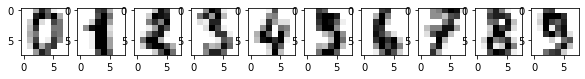

In [49]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show();

Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [12]:
X1_Scaled = preprocessing.StandardScaler().fit(X1)
X1_Scaled = X1_Scaled.transform(X1)  

In [14]:
X1_Scaled = pd.DataFrame(X1_Scaled)

In [16]:
X1_Scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.310025,0.047254,0.379835,-0.626913,-0.871974,-0.430134,-0.140883,-0.031639,-0.611056,...,-0.771574,-0.200248,-0.031639,-0.291074,0.184702,0.253910,-0.416104,-1.202572,-0.529799,-0.204578
1,0.0,-0.310025,-1.041558,0.151294,0.299103,-0.160159,-0.430134,-0.140883,-0.031639,-0.611056,...,-0.771574,-0.200248,-0.031639,-0.291074,-1.041198,-0.197084,0.839113,0.475591,-0.529799,-0.204578
2,0.0,-0.310025,-1.041558,-1.677032,0.762112,1.085519,-0.430134,-0.140883,-0.031639,-0.611056,...,0.278472,-0.200248,-0.031639,-0.291074,-1.041198,-2.001060,-0.206902,1.482489,1.557849,-0.204578
3,0.0,-0.310025,0.482780,0.836916,0.299103,-0.871974,-0.430134,-0.140883,-0.031639,2.295274,...,1.118510,-0.200248,-0.031639,-0.291074,0.389019,0.253910,0.211504,0.307775,-0.529799,-0.204578
4,0.0,-0.310025,-1.041558,-2.362655,-0.163905,-1.049928,-0.430134,-0.140883,-0.031639,-0.611056,...,-0.771574,-0.200248,-0.031639,-0.291074,-1.041198,-2.226557,0.839113,-0.531306,-0.529799,-0.204578


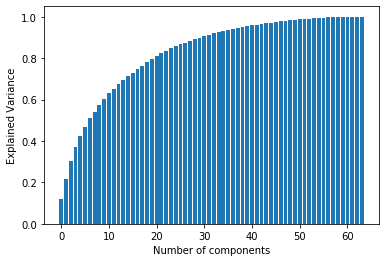

In [19]:
#perform PCA

pca = PCA(X1_Scaled.shape[1])
X1_PCA = pca.fit_transform(X1_Scaled)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n = X1_Scaled.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [24]:
eigenvalues[:n].cumsum()

array([0.12117158, 0.21842642, 0.30171324, 0.37292544, 0.42574564,
       0.46904319, 0.50954427, 0.54212306, 0.57401957, 0.60263202,
       0.6293656 , 0.65292043, 0.67430242, 0.69507522, 0.71327924,
       0.73013008, 0.7467151 , 0.7629762 , 0.77899253, 0.7942588 ,
       0.80882039, 0.822905  , 0.83565245, 0.84711214, 0.85699655,
       0.86658115, 0.87544264, 0.88383554, 0.89175931, 0.89938835,
       0.90658229, 0.91349858, 0.91993161, 0.92600395, 0.93150878,
       0.93668332, 0.94134244, 0.94573287, 0.95010298, 0.95440603,
       0.95826954, 0.96197328, 0.96547351, 0.96877367, 0.97182493,
       0.97483347, 0.9775954 , 0.98021209, 0.98249187, 0.98461417,
       0.98672862, 0.98860967, 0.99043381, 0.99202581, 0.99358611,
       0.9949802 , 0.99621647, 0.99735486, 0.99838478, 0.99924235,
       1.        , 1.        , 1.        , 1.        ])

### *How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?* ###

## 50% is 7 components, 80% is 21 components

### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

In [50]:
pca_2 = PCA(2)
X1_PCA_2 = pca_2.fit_transform(X1_Scaled)
eigenvalues = pca_2.explained_variance_ratio_

In [51]:
X1_PCA_2.shape

(1000, 2)

ValueError: cannot reshape array of size 2 into shape (2,2)

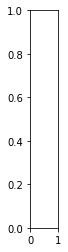

In [88]:
plt.subplot(1,10,1)
plt.imshow(X1_PCA_2[0].reshape(2,2), cmap=plt.cm.gray_r)

## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [57]:
# import dataset
df = pd.read_csv("data/portland-oregon-average-monthly-.csv")

In [58]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [59]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [60]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [61]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [62]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


### Q1. Visualize the time-series of monthly ridership

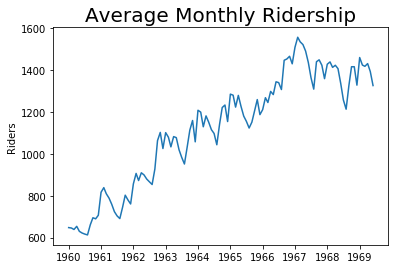

In [70]:
plt.plot(df.month, df.avgMonthlyRide)
plt.title('Average Monthly Ridership', fontsize=20)
plt.ylabel('Riders');

### Q2. Visualize the 12-month moving average to assess the trend

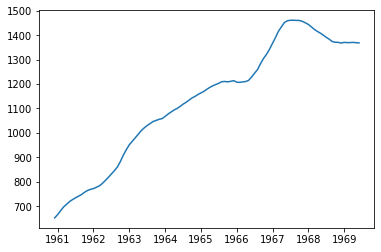

In [77]:
rolling_mean = df.avgMonthlyRide.rolling(window=12).mean()
plt.plot(df.month, rolling_mean);

### Q3. Perform seasonal decomposition using 12 month period

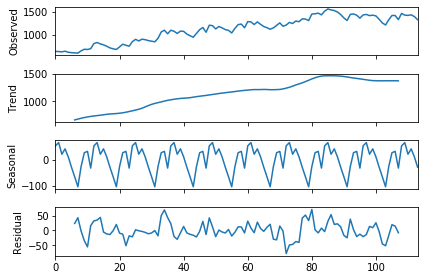

In [81]:
res = sm.tsa.seasonal_decompose(df.avgMonthlyRide, model='additive',freq=12)
res.plot()
plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)